# Finding Stereoisomer of Molecules #

In [1]:
from rdkit import Chem

from stereomolgraph import StereoMolGraph
from stereomolgraph.ipython import View2D
from stereomolgraph.experimental import generate_stereoisomers

View2D.show_atom_numbers = True
View2D.show_h = False
View2D.generate_bond_orders = False
View2D.height = 300
View2D.width = 1000

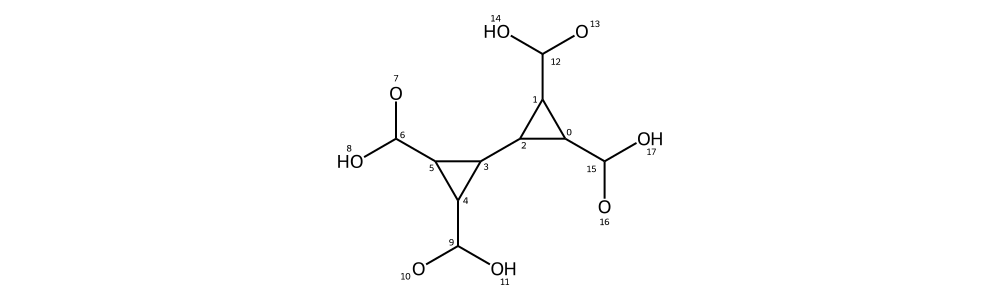

In [2]:
rdmol = Chem.AddHs(Chem.MolFromSmiles("[CH]1([CH](C1C2[CH]([CH]2C(=O)O)C(=O)O)C(=O)O)C(=O)O"),
                   explicitOnly=False)
smg = StereoMolGraph.from_rdmol(rdmol)
smg

In [3]:
isomers = generate_stereoisomers(smg, enantiomers = True)
len(isomers)

10

In [4]:
all_isomers_stereo = []

for i in isomers:
    rdmol = i.to_rdmol(generate_bond_orders=True)
    
    stereocenters = Chem.FindMolChiralCenters(rdmol, includeUnassigned=False, force=True)
    
    isomer_stereo = []
    for atom_idx, stereo in stereocenters:
        atom = rdmol.GetAtomWithIdx(atom_idx)
        atom_idx = atom.GetIdx()
        isomer_stereo.append((atom_idx, stereo))

    isomer_stereo.sort()
    all_isomers_stereo.append(isomer_stereo)

all_isomers_stereo.sort()
all_isomers_stereo

[[(0, 'R'), (1, 'R'), (3, 'R'), (4, 'R'), (5, 'S')],
 [(0, 'R'), (1, 'R'), (3, 'S'), (4, 'S'), (5, 'R')],
 [(0, 'R'), (1, 'R'), (3, 'S'), (4, 'S'), (5, 'R')],
 [(0, 'R'), (1, 'R'), (4, 'R'), (5, 'R')],
 [(0, 'R'), (1, 'R'), (4, 'R'), (5, 'R')],
 [(0, 'R'), (1, 'R'), (4, 'S'), (5, 'S')],
 [(0, 'R'), (1, 'R'), (4, 'S'), (5, 'S')],
 [(0, 'R'), (1, 'S'), (2, 'S'), (4, 'R'), (5, 'R')],
 [(0, 'R'), (1, 'S'), (2, 'S'), (4, 'S'), (5, 'S')],
 [(0, 'S'), (1, 'R'), (2, 'R'), (4, 'R'), (5, 'R')]]